# Machine Learning Enhanced localization in 5G networks    

# Data preparation

## Data loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load the coverage and cir datasets

df = pd.read_csv('data/5G_cov_cir_C1_interpolated.csv')

## Data splitting

In [3]:
from sklearn.model_selection import train_test_split
Y = df[['latitude', 'longitude']]

X = df.drop(['latitude', 'longitude'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

# Model building

## Linear regression

### Training the model 

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Applying model for prediction

In [5]:
y_lr_train_pred = lr.predict(X_train)
y_lr_test_pred = lr.predict(X_test)

### Performance evaluation

In [6]:
from utils import mean_position_error
# training data performance

lr_train_mpe = mean_position_error(y_train, y_lr_train_pred)
lr_test_mpe = mean_position_error(y_test, y_lr_test_pred)
errors_lr = pd.DataFrame([["Linear Regression", lr_train_mpe, lr_test_mpe]], columns=['Model', 'Train MPE', 'Test MPE'])

print("Performance evaluation: Linear Regression")
print("Training Mpe:", lr_train_mpe)
print("Test Mpe:", lr_test_mpe)

Performance evaluation: Linear Regression
Training Mpe: 0.1478233291510266
Test Mpe: 0.14242707351778974


## K-NN

### Training the model

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

### Applying the model for prediction

In [8]:
y_knn_train_pred = knn.predict(X_train)
y_knn_test_pred = knn.predict(X_test)

### Performance evaulation

In [9]:
knn_train_mpe = mean_position_error(y_train, y_knn_train_pred)
knn_test_mpe = mean_position_error(y_test, y_knn_test_pred)
errors_knn = pd.DataFrame([["KNN",knn_train_mpe, knn_test_mpe]], columns= ['Model','Train MPE', 'Test MPE'])

print("Performance evaluation: KNN")
print("Training Mpe:", knn_train_mpe)
print("Test Mpe:", knn_test_mpe)

Performance evaluation: KNN
Training Mpe: 0.0058389787023103825
Test Mpe: 0.012292586742445853


## Random Forest

### Training the model

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

### Applying the model for prediction

In [11]:
y_rf_train_pred = rf.predict(X_train)
y_rf_test_pred = rf.predict(X_test)

### Performance evalutaion

In [12]:
rf_train_mpe = mean_position_error(y_train, y_rf_train_pred)
rf_test_mpe = mean_position_error(y_test, y_rf_test_pred)
errors_rf = pd.DataFrame([["Random Forest",rf_train_mpe, rf_test_mpe]], columns= ['Model','Train MPE', 'Test MPE'])

print("Performance evaluation: Random Forest")
print("Training Mpe:", rf_train_mpe)
print("Test Mpe:",rf_test_mpe)

Performance evaluation: Random Forest
Training Mpe: 0.0
Test Mpe: 0.0


## Model comparison

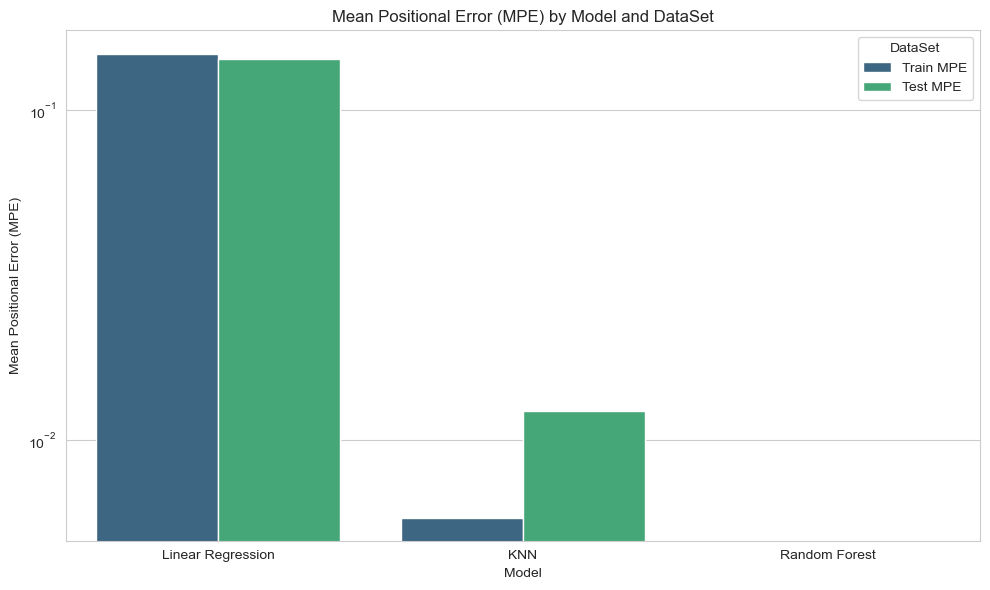

In [13]:
import seaborn as sns
errors_comp = pd.concat([errors_lr, errors_knn, errors_rf], axis=0)

# Assuming errors_comp is already prepared
errors_comp_melted = errors_comp.melt(id_vars='Model', var_name='DataSet', value_name='MPE')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=errors_comp_melted, x='Model', y='MPE', hue='DataSet', palette='viridis')

plt.title('Mean Positional Error (MPE) by Model and DataSet')
plt.ylabel('Mean Positional Error (MPE)')
plt.xlabel('Model')

plt.yscale('log')  # Using a logarithmic scale to better visualize low values

plt.tight_layout()
plt.show()